In [1]:
from imagen_post_hoc_helper import *
%matplotlib inline

In [2]:
DATA_DIR = r"/ritter/share/data/IMAGEN"
SAVE_DIR = r"/ritter/share/jihoon/imagen_ml/posthoc_analysis/figures"
posthoc = IMAGEN_posthoc()

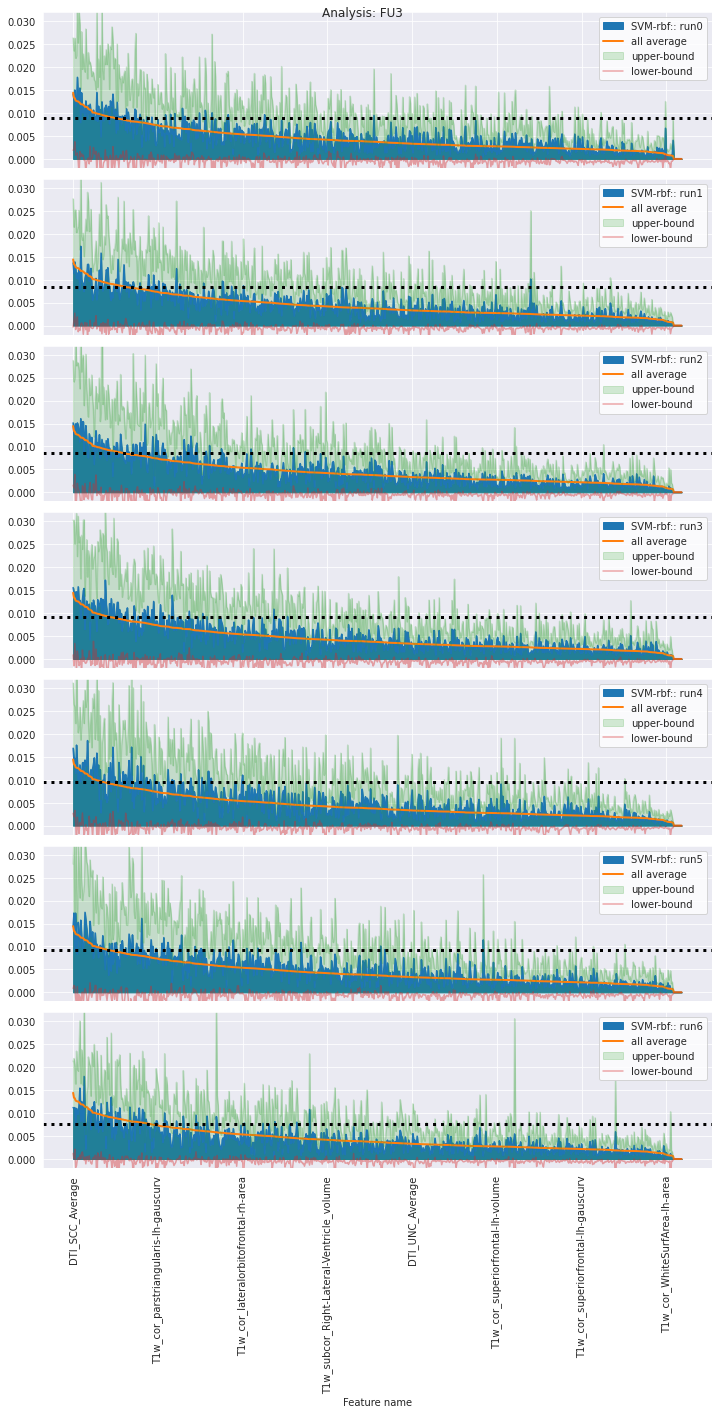

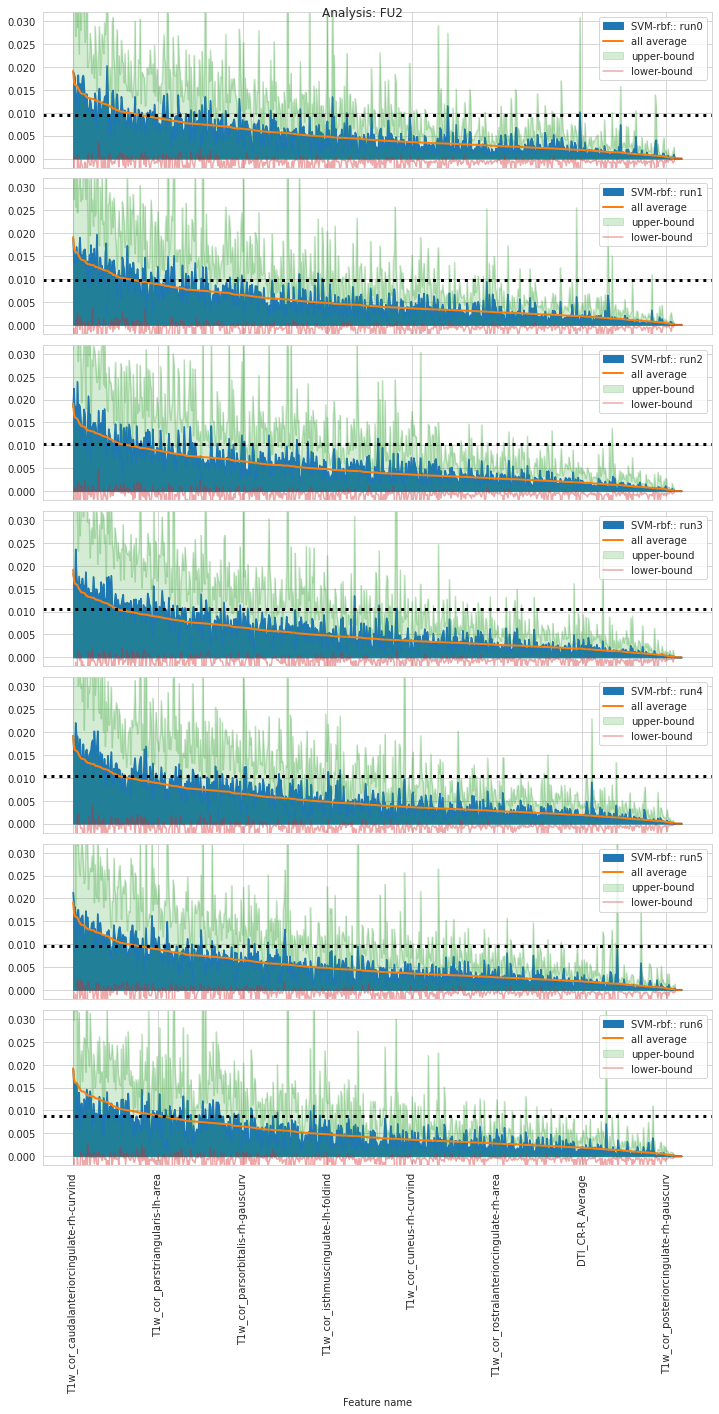

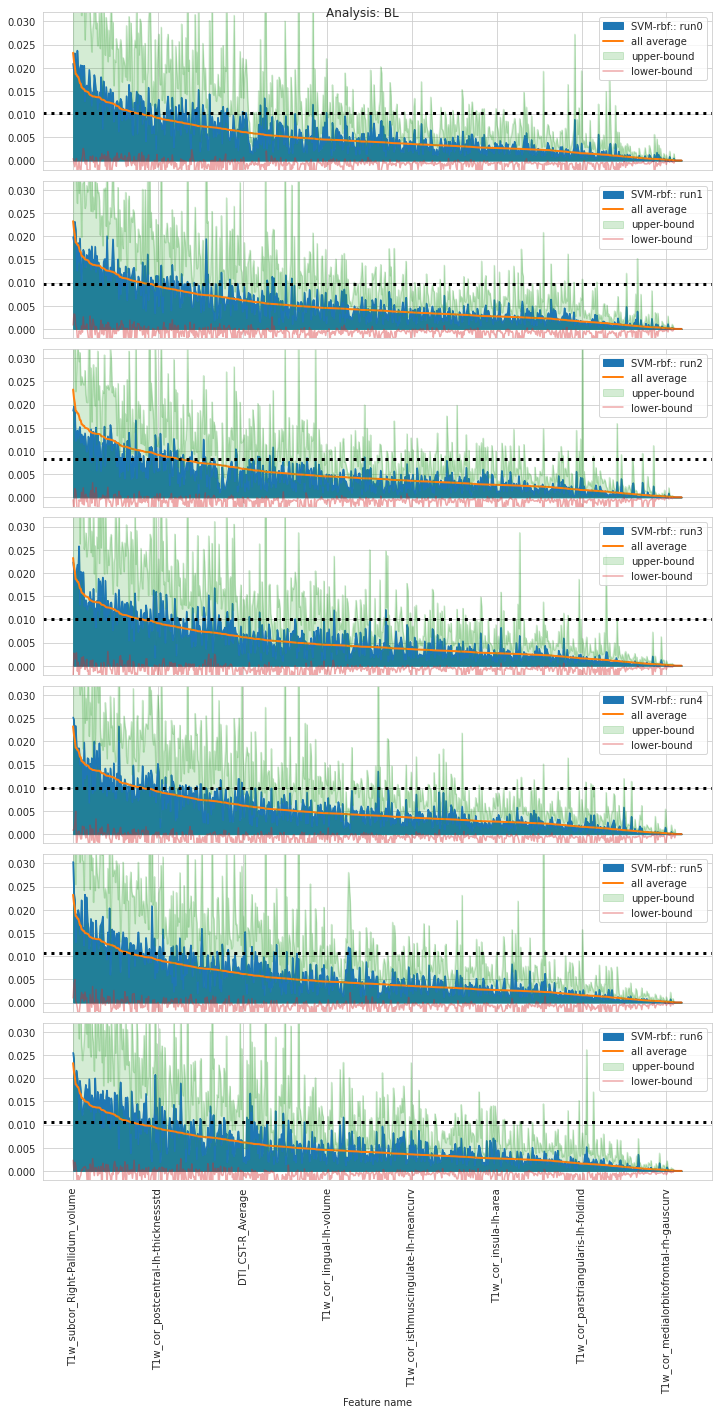

In [5]:
for tp in ['FU3', 'FU2', 'BL']:
    f, axes = plt.subplots(7,1, figsize=(10,20), sharex=True, sharey=True)
    sns.set_style('whitegrid')
    plt.suptitle(f'Analysis: {tp}')

    for i, axis in enumerate(axes.ravel()):
        df = posthoc.read_SHAP(f'all_{tp}_SHAP.csv').set_index('Feature name').filter(regex="SVM-rbf.*")
        df["all average"] =  df.filter(regex="SVM-rbf.* mean").apply(np.mean, axis=1)
        df = df.sort_values("all average", ascending=False)
        df.plot(y=f'SVM-rbf{i}_{tp} mean', label=f'SVM-rbf:: run{i}',  kind='area', 
                       rot=90, ax=axis, legend=True)
        df["all average"].plot(lw=2, label="all average", rot=90, ax=axis, legend=True)  

        axis.set_ylim([-0.002,0.032])

        # plot the upper and lower standard deviations in SHAP
        df[f'SVM-rbf{i}_{tp} std_up'] = df[f'SVM-rbf{i}_{tp} mean']  + df[f'SVM-rbf{i}_{tp} std'] 
        df[f'SVM-rbf{i}_{tp} std_down'] = df[f'SVM-rbf{i}_{tp} mean']  - df[f'SVM-rbf{i}_{tp} std']

        df.plot(y=f'SVM-rbf{i}_{tp} std_up', kind='area', label='upper-bound', rot=90, ax=axis, legend=True,  alpha=0.2, stacked=False)
        df.plot(y=f'SVM-rbf{i}_{tp} std_down', kind='line', label='lower-bound', rot=90, ax=axis, legend=True, alpha=0.4, stacked=False)

        axis.axhline(2*df[f'SVM-rbf{i}_{tp} mean'].mean(), ls='dotted',lw=3, color='k')
    #     df_sorted[f'SVM-rbf{i}_{tp} mean'].cumsum().plot.area(alpha=0.2, rot=90, ax=axis)
    # SHAP_SVMrbf.filter(regex='SVM-rbf.* std').sort_values(
    #     by='SVM-rbf_{tp} all std', ascending=False).drop(columns=['SVM-rbf_{tp} all std']).plot(
    # alpha=0.5, rot=90, ax=axes[1])
    # SHAP_SVMrbf['SVM-rbf_{tp} all std'].sort_values(ascending=False).plot(lw=2, rot=90, ax=axes[1])
    plt.tight_layout()
    plt.show()

In [6]:
_ = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold='2mean', viz=True)

------------------------------------
    Analysis: FU3   
------------------------------------ 
Threshold >= 0.008742729358780971 



,ave. feature value,ave. SHAP value
DTI_SCC_Average,-0.873530,0.014433
T1w_cor_lateraloccipital-rh-thickness,-0.677426,0.013378
T1w_subcor_CSF_mean,0.790300,0.013244
T1w_cor_caudalanteriorcingulate-lh-foldind,-0.613880,0.012721
T1w_subcor_Brain-Stem_mean,-0.594370,0.012637
T1w_subcor_Right-Amygdala_volume,0.664147,0.012564
T1w_cor_parahippocampal-rh-area,0.770722,0.012542
T1w_cor_cuneus-rh-thickness,-0.634456,0.012373
T1w_subcor_Right-Hippocampus_mean,0.623355,0.012200
T1w_subcor_Left-Hippocampus_mean,0.663395,0.011909


,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,21,3,18,7,5,2,11,1,3,0,6,1


,SVM-rbf0_FU3 mean,SVM-rbf1_FU3 mean,SVM-rbf2_FU3 mean,SVM-rbf3_FU3 mean,SVM-rbf4_FU3 mean,SVM-rbf5_FU3 mean,SVM-rbf6_FU3 mean,all average
Feature name,,,,,,,,
DTI_SCC_Average,0.014127,0.013667,0.015137,0.015569,0.016892,0.014402,0.011235,0.014433
T1w_cor_lateraloccipital-rh-thickness,0.012873,0.011353,0.012539,0.014382,0.014206,0.017304,0.010990,0.013378
T1w_subcor_CSF_mean,0.015039,0.013902,0.014382,0.014225,0.014667,0.009284,0.011206,0.013244
T1w_cor_caudalanteriorcingulate-lh-foldind,0.011392,0.012186,0.014931,0.014588,0.011412,0.017284,0.007255,0.012721
T1w_subcor_Brain-Stem_mean,0.011784,0.010304,0.013049,0.014657,0.017569,0.010069,0.011029,0.012637
T1w_subcor_Right-Amygdala_volume,0.017804,0.011480,0.015137,0.012049,0.013353,0.008324,0.009804,0.012564
T1w_cor_parahippocampal-rh-area,0.012373,0.010137,0.014490,0.015745,0.010049,0.015265,0.009735,0.012542
T1w_cor_cuneus-rh-thickness,0.014275,0.012196,0.013461,0.011980,0.010049,0.012686,0.011961,0.012373
T1w_subcor_Right-Hippocampus_mean,0.015461,0.007725,0.010941,0.012794,0.013255,0.009765,0.015461,0.012200


------------------------------------
    Analysis: FU2   
------------------------------------ 
Threshold >= 0.009865359217400357 



,ave. feature value,ave. SHAP value
T1w_cor_caudalanteriorcingulate-rh-curvind,1.591756,0.019167
T1w_cor_caudalanteriorcingulate-lh-thicknessstd,-0.746035,0.017010
T1w_cor_cuneus-lh-curvind,0.462589,0.016139
T1w_cor_parstriangularis-rh-thicknessstd,-0.817190,0.015997
T1w_cor_pericalcarine-lh-curvind,0.010160,0.015952
T1w_cor_inferiortemporal-rh-thicknessstd,-0.854132,0.015746
T1w_subcor_CC_Anterior_mean,-0.642157,0.015396
T1w_cor_cuneus-rh-thickness,-0.725790,0.014955
T1w_cor_parsopercularis-lh-volume,-0.628446,0.014697
DTI_CST-L_Average,0.775736,0.014336


,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,32,1,31,7,6,1,24,3,9,1,11,0


,SVM-rbf0_FU2 mean,SVM-rbf1_FU2 mean,SVM-rbf2_FU2 mean,SVM-rbf3_FU2 mean,SVM-rbf4_FU2 mean,SVM-rbf5_FU2 mean,SVM-rbf6_FU2 mean,all average
Feature name,,,,,,,,
T1w_cor_caudalanteriorcingulate-rh-curvind,0.018951,0.018882,0.018324,0.018314,0.019235,0.021304,0.019157,0.019167
T1w_cor_caudalanteriorcingulate-lh-thicknessstd,0.018490,0.013353,0.022441,0.017098,0.015265,0.017804,0.014618,0.017010
T1w_cor_cuneus-lh-curvind,0.017657,0.015353,0.015284,0.014755,0.016118,0.018186,0.015618,0.016139
T1w_cor_parstriangularis-rh-thicknessstd,0.011755,0.013353,0.018539,0.023647,0.022029,0.007843,0.014814,0.015997
T1w_cor_pericalcarine-lh-curvind,0.013755,0.017059,0.012667,0.017382,0.018863,0.015912,0.016029,0.015952
T1w_cor_inferiortemporal-rh-thicknessstd,0.014696,0.013696,0.023922,0.015373,0.019108,0.016951,0.006480,0.015746
T1w_subcor_CC_Anterior_mean,0.018255,0.015137,0.015118,0.012314,0.016137,0.017559,0.013255,0.015396
T1w_cor_cuneus-rh-thickness,0.010167,0.015471,0.018951,0.017706,0.015343,0.013118,0.013931,0.014955
T1w_cor_parsopercularis-lh-volume,0.016353,0.019078,0.018431,0.012941,0.018510,0.011588,0.005980,0.014697


------------------------------------
    Analysis: BL   
------------------------------------ 
Threshold >= 0.009929843425548151 



,ave. feature value,ave. SHAP value
T1w_subcor_Right-Pallidum_volume,0.775721,0.023244
T1w_cor_temporalpole-lh-volume,0.777293,0.021441
T1w_subcor_Right-Cerebellum-Cortex_volume,0.830438,0.020328
T1w_subcor_CC_Anterior_mean,-0.711844,0.018650
T1w_cor_rostralmiddlefrontal-lh-thicknessstd,-0.772379,0.018557
T1w_cor_parahippocampal-rh-area,0.823870,0.018141
T1w_cor_inferiorparietal-rh-volume,0.747201,0.018085
T1w_cor_lateraloccipital-lh-thickness,-0.733224,0.017517
T1w_cor_bankssts-rh-meancurv,-0.710600,0.016707
T1w_cor_parahippocampal-rh-volume,0.882348,0.016598


,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,46,9,37,7,2,5,30,5,5,7,13,0


,SVM-rbf0_BL mean,SVM-rbf1_BL mean,SVM-rbf2_BL mean,SVM-rbf3_BL mean,SVM-rbf4_BL mean,SVM-rbf5_BL mean,SVM-rbf6_BL mean,all average
Feature name,,,,,,,,
T1w_subcor_Right-Pallidum_volume,0.020892,0.019804,0.018647,0.022333,0.025186,0.030343,0.025500,0.023244
T1w_cor_temporalpole-lh-volume,0.019167,0.018696,0.019637,0.020520,0.024520,0.023716,0.023833,0.021441
T1w_subcor_Right-Cerebellum-Cortex_volume,0.023157,0.023118,0.018931,0.017265,0.019608,0.022049,0.018167,0.020328
T1w_subcor_CC_Anterior_mean,0.020873,0.021353,0.012127,0.019637,0.023373,0.012922,0.020265,0.018650
T1w_cor_rostralmiddlefrontal-lh-thicknessstd,0.020049,0.016147,0.013402,0.020510,0.019088,0.019049,0.021657,0.018557
T1w_cor_parahippocampal-rh-area,0.023725,0.012539,0.014431,0.021775,0.016961,0.017618,0.019941,0.018141
T1w_cor_inferiorparietal-rh-volume,0.018373,0.018549,0.012686,0.020765,0.018510,0.019971,0.017745,0.018085
T1w_cor_lateraloccipital-lh-thickness,0.017627,0.014441,0.014373,0.025794,0.018529,0.018667,0.013186,0.017517
T1w_cor_bankssts-rh-meancurv,0.019931,0.019559,0.015196,0.013127,0.014980,0.014706,0.019451,0.016707


In [7]:
MNI_Atlas = r"/ritter/share/data/IMAGEN/posthoc/atlas/MNI152_T1_1mm_brain.nii.gz"
fu3 = r"/ritter/share/jihoon/imagen_ml/post_hoc_analysis/results/IMAGEN_FU3_Feature_dm_ver05_roi.nii.gz"
fu2 = r"/ritter/share/jihoon/imagen_ml/post_hoc_analysis/results/IMAGEN_FU2_Feature_dm_ver05_roi.nii.gz"
bl = r"/ritter/share/jihoon/imagen_ml/post_hoc_analysis/results/IMAGEN_BL_Feature_dm_ver05_roi.nii.gz"
cm = mpl.cm.cool # mpl.cm.cool, mpl.cm.bwr, mpl.cm.seismic, colors.red_blue
mode = 'x' # 'x', 'y','z','Ortho', 'tiled'

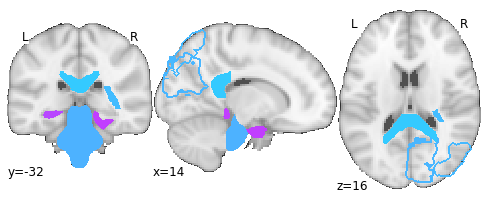

In [8]:
display = plotting.plot_anat(cmap='gray', bg_img=MNI_Atlas, black_bg=False, cut_coords=[14, -32, 16], draw_cross=None)
display.add_overlay(fu3, cmap=cm, vmin=-1.5, vmax=+1.5)
# display.savefig('figures/IMAGEN_Feature_ROI_FU3.svg')

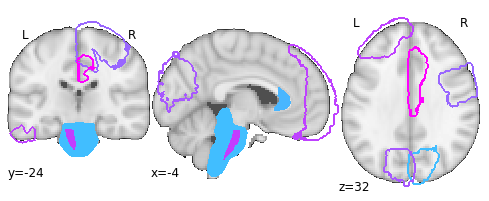

In [9]:
display = plotting.plot_anat(cmap='gray', bg_img=MNI_Atlas, cut_coords=[-4, -24, 32], draw_cross=None)
display.add_overlay(fu2, cmap=cm, vmin=-1.5, vmax=+1.5)
# display.savefig('figures/IMAGEN_Feature_ROI_FU2.svg')

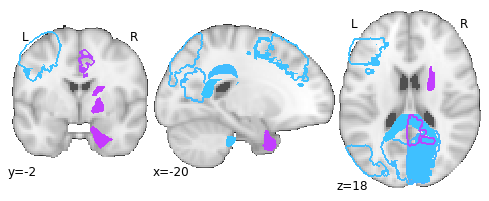

In [10]:
display = plotting.plot_anat(cmap='gray', bg_img=MNI_Atlas, black_bg=False, cut_coords=[-20, -2, 18], draw_cross=None)
display.add_overlay(bl, cmap=cm, vmin=-1.5, vmax=+1.5)
# display.savefig('figures/IMAGEN_Feature_ROI_BL.svg')

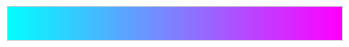

In [11]:
save_colormap(cm, viz=False)